<a href="https://colab.research.google.com/github/ramya940758/Ramya-mundru/blob/main/INFO5731_Assignment_Four_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster.


In [ ]:
!pip install biterm

In [ ]:
import nltk
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Loading dataset, assuming it's a CSV file with a 'clean_text' column.
df = pd.read_csv('reviews_terrifier_annotated.csv')
documents = df['clean_text'].tolist()

# Preprocessing: tokenization, stopwords removal, and lowercase
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return tokens

processed_documents = [preprocess(doc) for doc in documents]

# Create a dictionary and a corpus for LDA
dictionary = corpora.Dictionary(processed_documents)
corpus = [dictionary.doc2bow(doc) for doc in processed_documents]

# Build the LDA model
num_topics = 10  # Adjust the number of topics as needed
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the top 10 topics and their words
for topic_id, topic in lda_model.print_topics(num_topics=num_topics, num_words=10):
    print(f"Topic {topic_id + 1}: {topic}")

# Optional: Assign topics to documents
topics_per_document = [lda_model.get_document_topics(doc) for doc in corpus]
df['topics'] = topics_per_document

# Optional: Display topics for each document
for i, row in df.iterrows():
    print(f"Document {i + 1} - Topics: {row['topics']}")

# Optional: Summarize and describe the topics
topic_summaries = []
for topic_id, topic in lda_model.print_topics(num_topics=num_topics, num_words=10):
    words = [word for word, prob in lda_model.show_topic(topic_id)]
    topic_summary = {
        "Topic": topic_id + 1,
        "Top Words": words
    }
    topic_summaries.append(topic_summary)

for summary in topic_summaries:
    print(f"Topic {summary['Topic']} - Top Words: {', '.join(summary['Top Words'])}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Topic 1: 0.021*"terrifier" + 0.021*"film" + 0.017*"2" + 0.017*"horror" + 0.013*"''" + 0.013*"``" + 0.013*"original" + 0.013*"great" + 0.008*"art" + 0.008*"clown"
Topic 2: 0.030*"like" + 0.030*"film" + 0.020*"scenes" + 0.020*"watch" + 0.020*"final" + 0.020*"quite" + 0.010*"art" + 0.010*"clown" + 0.010*"little" + 0.010*"n't"
Topic 3: 0.035*"'s" + 0.016*"art" + 0.014*"story" + 0.013*"film" + 0.012*"girl" + 0.012*"gore" + 0.011*"clown" + 0.011*"leone" + 0.010*"slasher" + 0.009*"movie"
Topic 4: 0.021*"art" + 0.018*"clown" + 0.017*"horror" + 0.015*"film" + 0.014*"gore" + 0.012*"sadistic" + 0.011*"2" + 0.011*"terrifier" + 0.010*"'s" + 0.008*"extreme"
Topic 5: 0.016*"terrifier" + 0.016*"movie" + 0.016*"time" + 0.016*"run" + 0.016*"gory" + 0.016*"plot" + 0.016*"better" + 0.016*"would" + 0.008*"art" + 0.008*"'s"
Topic 6: 0.024*"n't" + 0.024*"one" + 0.019*"'s" + 0.015*"movie" + 0.015*"well" + 0.015*"terrifier" + 0.015*"first" + 0.015*"2" + 0.014*"'ve" + 0.010*"art"
Topic 7: 0.024*"'s" + 0.020*"mo

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
import numpy as np

# Loading dataset, assuming it's a CSV file with a 'clean_text' column.
df = pd.read_csv('reviews_terrifier_annotated.csv')

# Assuming you have a 'text' column in your dataset, preprocess the text if necessary.

# Define the text representation features
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])

# Fit the LDA model
num_topics = 10  # Adjust the number of topics as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Assign topics to documents
topic_assignments = lda.transform(X)
df['Topic'] = topic_assignments.argmax(axis=1)

# Printing the top words for each topic
feature_names = vectorizer.get_feature_names_out()
topic_words = {}
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topic_words[f"Topic {topic_idx + 1}"] = top_words

for topic, words in topic_words.items():
    print(f"{topic}: {', '.join(words)}")

# Clustering the documents using K-Means
num_clusters = 10  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(topic_assignments)

# Printing the top documents for each cluster
cluster_documents = {}
for cluster_id in range(num_clusters):
    cluster_documents[f"Cluster {cluster_id + 1}"] = df[df['Cluster'] == cluster_id]['clean_text'].head(5).tolist()

for cluster, documents in cluster_documents.items():
    print(f"{cluster} - Top Documents:")
    for i, doc in enumerate(documents):
        print(f"Document {i + 1}: {doc}")
    print()

# Summarizing and describing the topic for each cluster
cluster_topics = {}
for cluster_id in range(num_clusters):
    cluster_topics[f"Cluster {cluster_id + 1}"] = df[df['Cluster'] == cluster_id]['Topic'].mode()[0]

for cluster, topic in cluster_topics.items():
    print(f"{cluster} - Topic: {topic}")


Topic 1: previous, saga, sequel, disturbing, character, film, halloween, good, strength, improvements
Topic 2: film, art, movie, sienna, simply, dad, dumb, anatomy, gore, rented
Topic 3: fx, redemption, think, weird, damien, good, movie, story, appreciate, games
Topic 4: terrifier, liked, original, don, great, need, works, ve, singing, goory
Topic 5: gonna, definitely, love, protagonists, knocked, elliot, seat, squirm, revisit, oh
Topic 6: art, scenes, quite, clown, film, like, final, sadistic, watch, little
Topic 7: horror, sienna, like, art, jonathan, terrifier, good, gore, lacks, film
Topic 8: job, movies, hostel, leone, saw, horror, big, impressive, effects, like
Topic 9: movie, just, overall, gory, story, clown, horror, better, bad, scenes
Topic 10: humor, absolutely, films, film, impossible, unforgettable, limits, undercurrent, direction, favourite


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 - Top Documents:
Document 1: A mumbo jumbo impressive, f**up sequel with the ever star Art the Clown, where no professional clown could have done a better job. It has at least 25 minutes over-runtime, the folks in the editing room where probably asleep all the way. It features an impressive Lauren LaVera who looks 6 years less and does a more than decent job acting-wise.The gore and super visual effects, besides the blood color, are plenty, but as they are scattered randomly and sort of unimpressively throughout, they fail to ignite the desired effects.If they do a better job with the film logic, the 'Terrifier' productions could be memorable and ill-enthralling.Screenplay/storyline/plots: 5Development: 7.5Realism: 7Entertainment: 7.5Acting: 8Filming/photography/cinematography: 7VFX: 8Music/score/sound: 6.5Depth: 2.5Logic: 1Flow: 7.5Horror/thriller: 7.5Ending: 4.5.
Document 2: I don't understand why Leone's movies have such a strong cult following. Art is entertaining at time

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

# loading your csv file
file_path = '/content/reviews_terrifier_annotated.csv'
df = pd.read_csv(file_path)

# Cleaning the text data
df['Cleaned Data'] = df['clean_text'].str.replace('[^\w\s]', '')  # Removal of punctuation
df['Cleaned Data'] = df['Cleaned Data'].apply(lambda x: " ".join(x.lower() for x in x.split()))  # Lowercase
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Cleaned Data'] = df['Cleaned Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Replace 'sentiment' with the correct column name for sentiment
sentiment_column = 'sentiment'

# Splitting data into 80-20 train and test data
tfidf_vector = TfidfVectorizer()
X_tfidf = tfidf_vector.fit_transform(df['Cleaned Data'])
x_train, x_test, y_train, y_test = train_test_split(X_tfidf,
                                                    df[sentiment_column],
                                                    test_size=0.2,
                                                    random_state=42)

# Checking the distribution of classes in the test set
print("Class distribution in the test set:")
print(y_test.value_counts())

# Multinomial Naive Bayes model
mnb = MultinomialNB()
model_mnb = mnb.fit(x_train, y_train)
y_pred_mnb = model_mnb.predict(x_test)
print('Accuracy of Multinomial Naive Bayes:', accuracy_score(y_pred_mnb, y_test))
print(classification_report(y_test, y_pred_mnb, zero_division=1))  # Setting zero_division=1 to handle zero divisions

# Cross-validation using MNB
scores_mnb = cross_val_score(mnb, x_test, y_test, cv=5)
print("Cross-validation using MNB:", scores_mnb.mean())

# Linear Support Vector Machine (SVM) model
svm = LinearSVC()
model_svm = svm.fit(x_train, y_train)
y_pred_svm = model_svm.predict(x_test)
print('Accuracy of SVM:', accuracy_score(y_pred_svm, y_test))
print(classification_report(y_test, y_pred_svm, zero_division=1))  # Setting zero_division=1 to handle zero divisions

# Cross-validation using SVM
# Use a smaller number of splits, e.g., cv=5
scores_svm = cross_val_score(svm, x_test, y_test, cv=5)
print("Cross-validation using SVM:", scores_svm.mean())


Class distribution in the test set:
positive    9
negative    8
neutral     3
Name: sentiment, dtype: int64
Accuracy of Multinomial Naive Bayes: 0.35
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         8
     neutral       0.09      0.33      0.14         3
    positive       0.75      0.67      0.71         9

    accuracy                           0.35        20
   macro avg       0.28      0.33      0.28        20
weighted avg       0.35      0.35      0.34        20

Cross-validation using MNB: 0.35
Accuracy of SVM: 0.35
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         8
     neutral       0.09      0.33      0.14         3
    positive       0.75      0.67      0.71         9

    accuracy                           0.35        20
   macro avg       0.28      0.33      0.28        20
weighted avg       0.35      0.35      0.34        20

Cross-validation using SVM: 0.35


<ipython-input-17-978dac2ca30f>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cleaned Data'] = df['clean_text'].str.replace('[^\w\s]', '')  # Removal of punctuation
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset, assuming it's a CSV file with 'text' and 'sentiment' columns.
df = pd.read_csv('reviews_terrifier_annotated.csv')

# Assuming you have a 'clean_text' column containing the text data and a 'sentiment' column with labels.

# Step 1: Feature Selection
X = df['clean_text']  # Text data as features
y = df['sentiment']  # Sentiment labels

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Step 2: Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Step 3: Select Supervised Learning Algorithms and Evaluate
# Algorithm 1: Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='accuracy')
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# Algorithm 2: Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_cv_scores = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='accuracy')
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)

# Calculate performance metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

logistic_metrics = calculate_metrics(y_test, logistic_predictions)
random_forest_metrics = calculate_metrics(y_test, random_forest_predictions)

# Display performance metrics
print("Logistic Regression Metrics:")
print("Accuracy:", logistic_metrics[0])
print("Precision:", logistic_metrics[1])
print("Recall:", logistic_metrics[2])
print("F1 Score:", logistic_metrics[3])
print()

print("Random Forest Metrics:")
print("Accuracy:", random_forest_metrics[0])
print("Precision:", random_forest_metrics[1])
print("Recall:", random_forest_metrics[2])
print("F1 Score:", random_forest_metrics[3])


Logistic Regression Metrics:
Accuracy: 0.35
Precision: 0.35113636363636364
Recall: 0.35
F1 Score: 0.33907563025210086

Random Forest Metrics:
Accuracy: 0.5
Precision: 0.5650000000000001
Recall: 0.5
F1 Score: 0.5179487179487179


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.


In [ ]:
import pandas as pd
sf = pd.read_csv('test.csv')
sf.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
import pandas as pd
sf = pd.read_csv('train.csv')
sf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
sf.drop(sf.columns[[0, 2, 3, 15, 17, 18]], axis=1, inplace=True)
sf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotArea        1460 non-null   int64  
 2   Street         1460 non-null   object 
 3   Alley          91 non-null     object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  RoofMatl       1460 non-null   object 
 17  Exterior1st    1460 non-null   object 
 18  Exterior

In [ ]:
sf.describe()


,MSSubClass,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


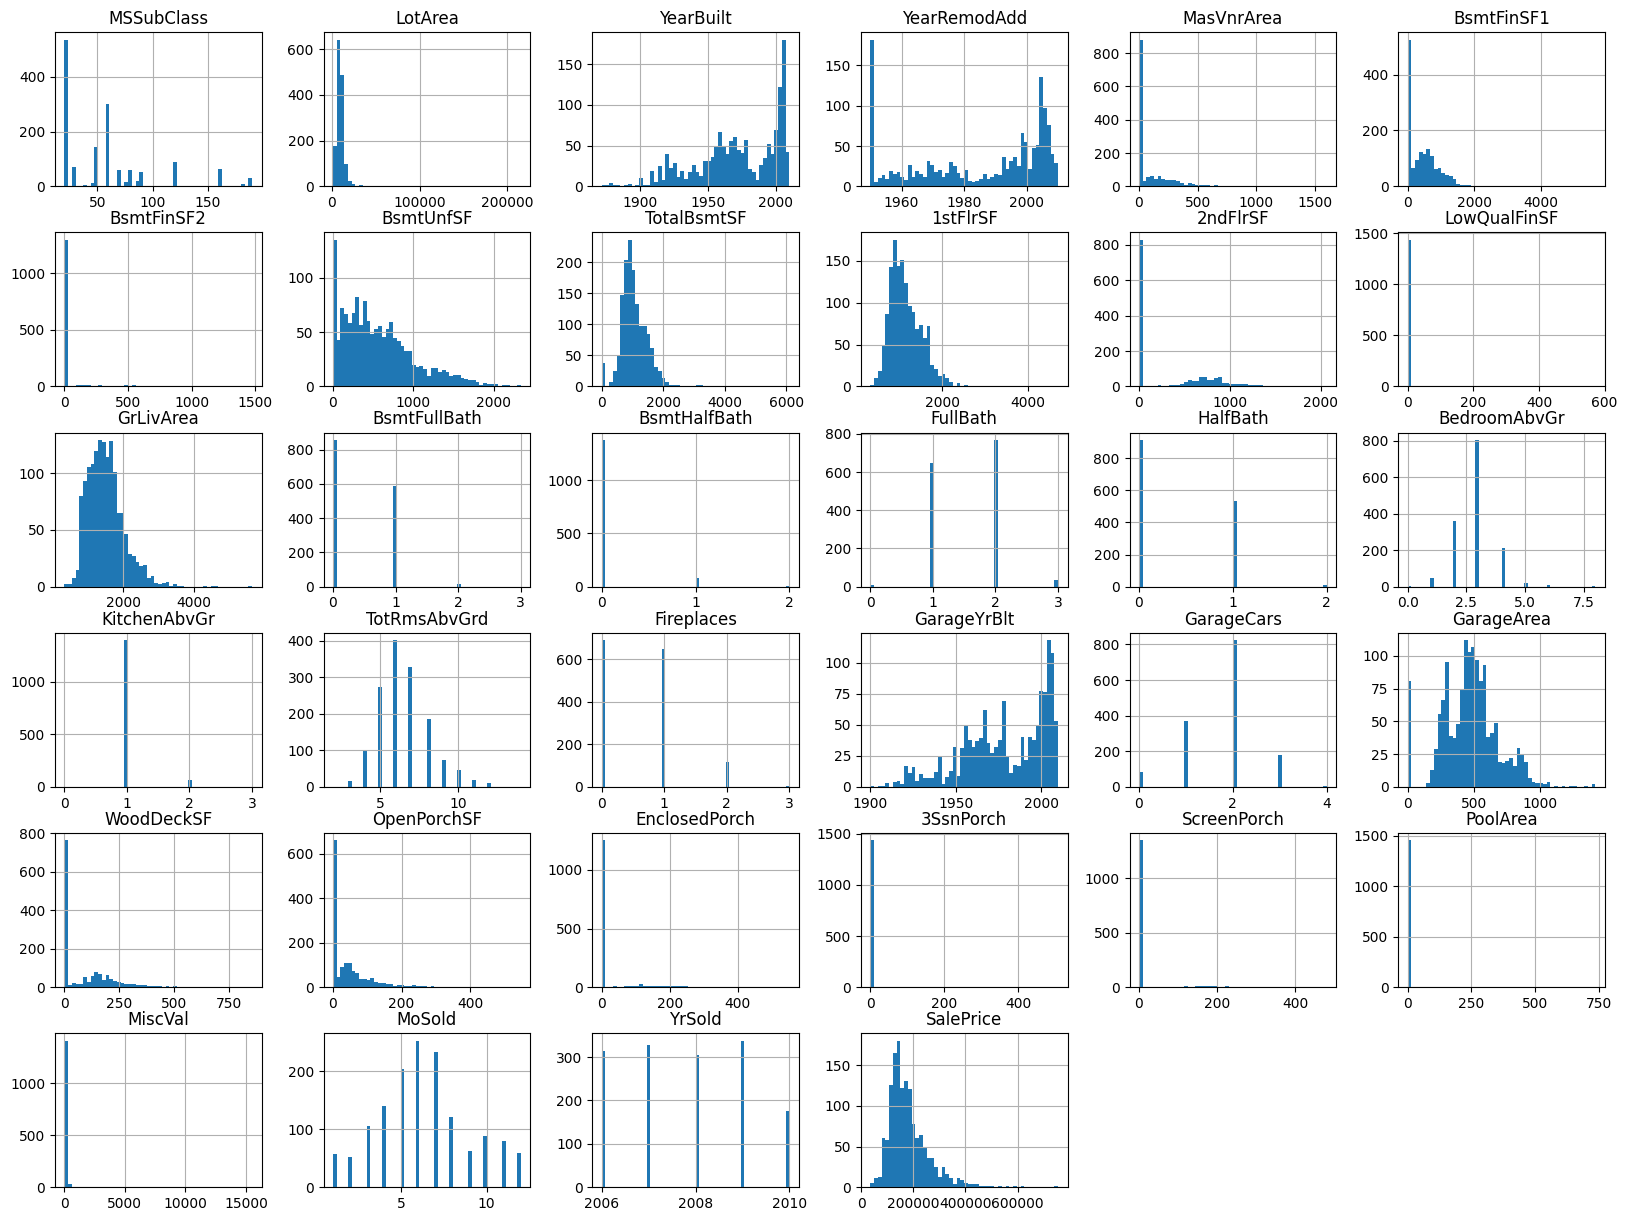

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
sf.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [ ]:
corr_matrix = sf.corr()
corr_matrix["LotArea"].sort_values(ascending=False)


<ipython-input-44-8a63a8912260>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = sf.corr()


LotArea          1.000000
1stFlrSF         0.299475
Fireplaces       0.271364
SalePrice        0.263843
GrLivArea        0.263116
TotalBsmtSF      0.260833
BsmtFinSF1       0.214103
TotRmsAbvGrd     0.190015
GarageArea       0.180403
WoodDeckSF       0.171698
BsmtFullBath     0.158155
GarageCars       0.154871
FullBath         0.126031
BedroomAbvGr     0.119690
BsmtFinSF2       0.111170
MasVnrArea       0.104160
OpenPorchSF      0.084774
PoolArea         0.077672
2ndFlrSF         0.050986
BsmtHalfBath     0.048046
ScreenPorch      0.043160
MiscVal          0.038068
3SsnPorch        0.020423
HalfBath         0.014259
YearBuilt        0.014228
YearRemodAdd     0.013788
LowQualFinSF     0.004779
MoSold           0.001205
BsmtUnfSF       -0.002618
YrSold          -0.014261
KitchenAbvGr    -0.017784
EnclosedPorch   -0.018340
GarageYrBlt     -0.024947
MSSubClass      -0.139781
Name: LotArea, dtype: float64

In [ ]:
len(sf['YearBuilt'].value_counts())

112

In [ ]:
freq = sf.groupby('YearBuilt').count()['LotArea']
mean = sf.groupby('YearBuilt').mean()['SalePrice']
cluster = pd.concat([freq, mean], axis=1)
cluster['YearBuilt'] = cluster.index
cluster.columns = ['freq', 'SalePrice','YearBuilt']
cluster.describe()

<ipython-input-40-44c3af04f47c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = sf.groupby('YearBuilt').mean()['SalePrice']


,freq,SalePrice,YearBuilt
count,112.000000,112.000000,112.000000
mean,13.035714,168213.487811,1952.053571
std,12.391459,55775.657497,35.995455
min,1.000000,82666.666667,1872.000000
25%,4.750000,131989.383333,1923.750000
50%,9.500000,153620.133013,1954.500000
75%,18.000000,201623.903409,1982.250000
max,67.000000,394432.000000,2010.000000


In [ ]:
cluster1 = cluster[cluster.SalePrice < 756]
cluster1.index

Int64Index([], dtype='int64', name='YearBuilt')

In [ ]:
cluster_temp = cluster[cluster.SalePrice >= 756]
cluster2 = cluster_temp[cluster_temp.freq <123]
cluster2.index

Int64Index([1872, 1875, 1880, 1882, 1885, 1890, 1892, 1893, 1898, 1900,
            ...
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
           dtype='int64', name='YearBuilt', length=112)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Load the training and testing data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Combine training and testing data for preprocessing
combined_data = pd.concat([train_data.drop("SalePrice", axis=1), test_data])

# Separate numeric and categorical columns
numeric_cols = combined_data.select_dtypes(include=np.number).columns
categorical_cols = combined_data.select_dtypes(include='object').columns

# Impute missing values for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
combined_data[numeric_cols] = numeric_imputer.fit_transform(combined_data[numeric_cols])

# Impute missing values for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
combined_data[categorical_cols] = categorical_imputer.fit_transform(combined_data[categorical_cols])

# Converting categorical to numerical using label encoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    combined_data[col] = label_encoder.fit_transform(combined_data[col])

# Splitting back into training and testing data
train_data_imputed = combined_data.iloc[:len(train_data)]
test_data_imputed = combined_data.iloc[len(train_data):]

# Scaling the data for better prediction
scaler = MinMaxScaler()
X = train_data_imputed
y = train_data["SalePrice"]

X_scaled_min_max = scaler.fit_transform(X)
X_scaled_min_max_df = pd.DataFrame(X_scaled_min_max, columns=X.columns)

X_scaled_min_max_test = scaler.transform(test_data_imputed)
X_scaled_min_max_df_test = pd.DataFrame(X_scaled_min_max_test, columns=test_data_imputed.columns)

# Splitting data into train and test (80-20)
x_train, x_test, y_train, y_test = train_test_split(X_scaled_min_max_df, y, test_size=0.2, random_state=0)

# Training the Linear Regression model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predicting the model
y_pred = regressor.predict(x_test)

# Model evaluation
print('Linear Regression R squared:', regressor.score(x_test, y_test))
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Predicting house prices for the test data
predicted_prices = regressor.predict(X_scaled_min_max_df_test)

# Displaying results
test_data["Predicted_SalePrice"] = predicted_prices
test_data[['Id', 'Predicted_SalePrice']].to_csv('predicted_prices.csv', index=False)





Linear Regression R squared: 0.49830744666167914
Root Mean Squared Error: 58860.9675541636


In [ ]:
import pandas as pd
sf = pd.read_csv('predicted_prices.csv')
sf.head()

,Id,Predicted_SalePrice
0,1461,120262.451085
1,1462,200895.450941
2,1463,177110.914351
3,1464,186609.992230
4,1465,188761.232120


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **pre-trained Large Language Model (LLM) from the Hugging Face Repository** for your specific task using the data collected in Assignment 3. After creating an account on Hugging Face (https://huggingface.co/), choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any Meta based text analysis model. Provide a brief description of the selected LLM, including its original sources, significant parameters, and any task-specific fine-tuning if applied.

Perform a detailed analysis of the LLM's performance on your task, including key metrics, strengths, and limitations. Additionally, discuss any challenges encountered during the implementation and potential strategies for improvement. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [2]:

import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the IMDb Reviews dataset
df = pd.read_csv('/content/reviews_terrifier_annotated.csv')

# Map string labels to numerical labels
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x.lower() == 'positive' else 0)

# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define your dataset class
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts.iloc[idx])
        label = int(self.labels.iloc[idx])

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            truncation=True,  # Explicitly set truncation to True
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Assuming 2 classes for sentiment

# Create datasets and data loaders
train_dataset = SentimentDataset(train_df['clean_text'], train_df['sentiment'], tokenizer, max_len=128)
test_dataset = SentimentDataset(test_df['clean_text'], test_df['sentiment'], tokenizer, max_len=128)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)  # Increased batch size
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)  # Increased batch size

# Training parameters
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)  # Using torch.optim.AdamW
epochs = 3

# Training loop
for epoch in range(epochs):
    model.train()
    for batch in train_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['label']

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Evaluation loop
model.eval()
true_labels = []
predicted_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['label']

        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)

        true_labels.extend(labels.numpy())
        predicted_labels.extend(predictions.numpy())

accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy}')





tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Accuracy: 0.55


In [3]:
from sklearn.metrics import confusion_matrix, classification_report

# Print confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[11  0]
 [ 9  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        11
           1       0.00      0.00      0.00         9

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
import torch

# Function to tokenize and predict sentiment
def predict_sentiment(text):
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        return_token_type_ids=False,
        truncation=True,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt'
    )

    with torch.no_grad():
        model.eval()
        input_ids = encoding['input_ids']
        attention_mask = encoding['attention_mask']
        output = model(input_ids, attention_mask=attention_mask)

    probs = torch.nn.functional.softmax(output.logits, dim=-1)
    predicted_class = torch.argmax(probs, dim=-1).item()

    return predicted_class, probs

# Take input from the user
user_input = input("Enter a movie review: ")

# Predict sentiment
predicted_class, class_probabilities = predict_sentiment(user_input)

# Display results
print("Predicted Class:", predicted_class)
print("Class Probabilities:", class_probabilities)

Enter a movie review: this movie is very good. I totally enjoyed this movie while watching it. The main lead in this movie justifies his role. 


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Predicted Class: 0
Class Probabilities: tensor([[0.7909, 0.2091]])
